![](./images/rec.jpg)

#### I will be using the subreddit interaction dataset.

It contains subreddit interactions from approximately 25k users.You should add unzipped subreddit dataset folder to your notebook directory.You can download the dataset [here](https://www.kaggle.com/colemaclean/subreddit-interactions/downloads/subreddit-interactions-for-25000-users.zip)

## Importing libraries

In [1]:
# Future Imports
from __future__ import division, print_function, absolute_import, unicode_literals

# Data Cleaning
import numpy as np
import pandas as pd
import missingno as msn

# Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

# Finding similarities 
from copy import deepcopy
from scipy.spatial.distance import cosine

# Removing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the data
df = pd.read_csv('reddit_data.csv')     

In [3]:
# Checking the first 10 entries of the data
df.head(10)

,username,subreddit,utc
0,kabanossi,photoshopbattles,1.482748e+09
1,kabanossi,GetMotivated,1.482748e+09
2,kabanossi,vmware,1.482748e+09
3,kabanossi,carporn,1.482748e+09
4,kabanossi,DIY,1.482747e+09
5,kabanossi,food,1.482747e+09
6,kabanossi,CatastrophicFailure,1.482514e+09
7,kabanossi,photoshopbattles,1.482514e+09
8,kabanossi,carporn,1.482513e+09
9,kabanossi,techsupport,1.482513e+09


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000000 entries, 0 to 13999999
Data columns (total 3 columns):
username     object
subreddit    object
utc          float64
dtypes: float64(1), object(2)
memory usage: 320.4+ MB


In [5]:
# Removing the third column
df = df[['username', 'subreddit']]

# EDA

In [6]:
users = df.username.unique()
n_users = df.username.nunique()
n_subreddit = df.subreddit.nunique()

print('The number of Rows: ' + str(df.shape[0]) )
print('The number of Columns: ' + str(df.shape[1]))
print('Number of unique Users: '+ str(n_users))
print('Number of unique subreddit: '+str(n_subreddit))
print('\n')
print('Unique users: '+ str(users))

The number of Rows: 14000000
The number of Columns: 2
Number of unique Users: 22610
Number of unique subreddit: 34967


Unique users: ['kabanossi' 'MahatmaGuru' 'Drums_And_Dreams' ..., 'Least_ValuablePlayer'
 'applebrush' 'RushNY']


** Checking Null Entries**

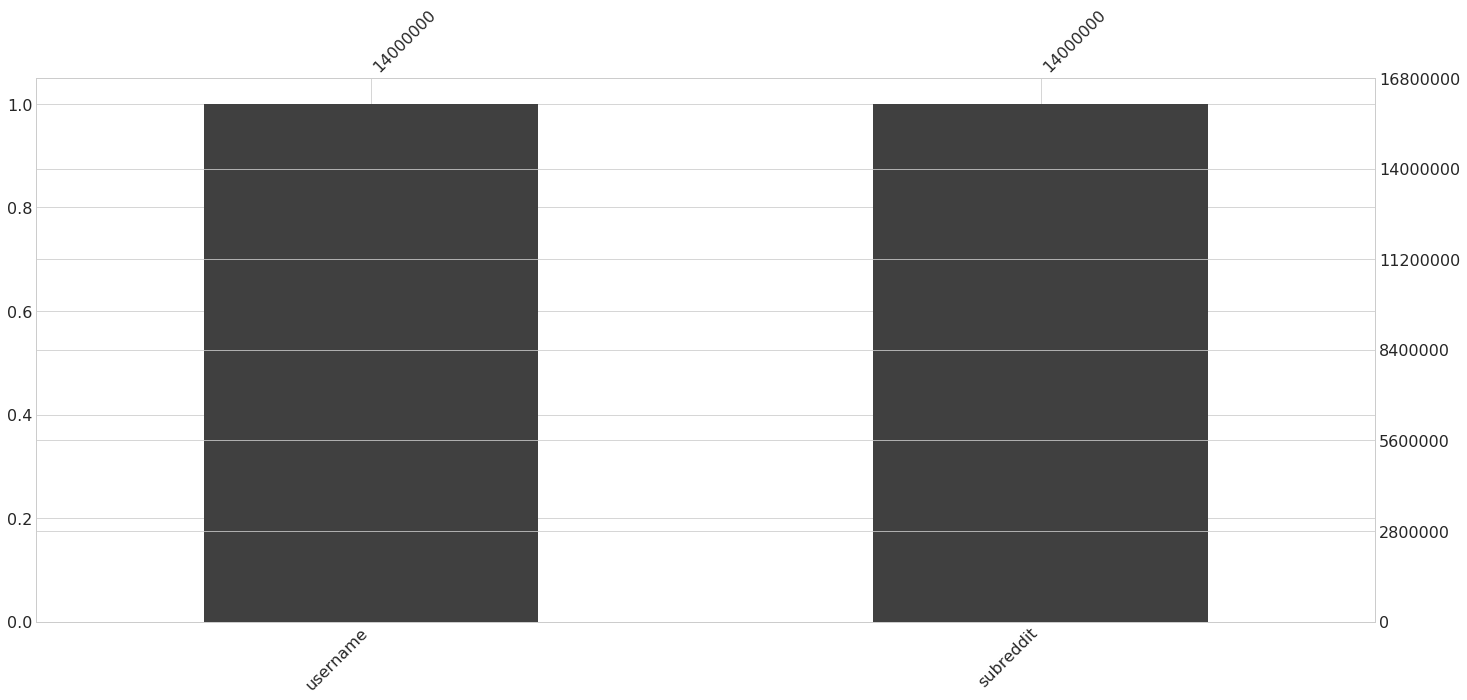

In [7]:
# Function to check for Null entries in the data 
msn.bar(df)                                           

 As seen from the above graph there are no null entries in both the columns 

## Showing the most popular subreddits in the Original dataset

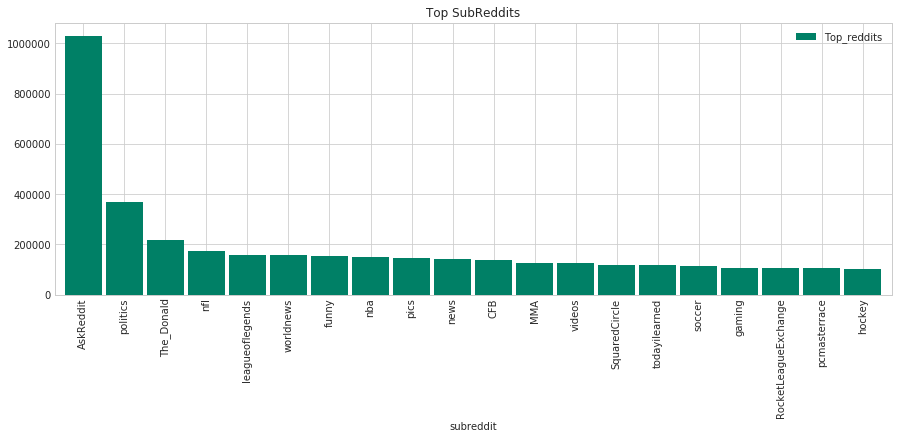

In [8]:
most_subreddit = deepcopy(df)
most_subreddit['Top_reddits'] = 1
most_subreddit = most_subreddit.groupby(['subreddit']).agg({'Top_reddits': 'count'}).reset_index()
top_subreddit = most_subreddit.sort_values(by='Top_reddits',ascending=False)[:20]

# Plotting the top 20 subreddits
top_subreddit.set_index('subreddit',inplace=True)
top_subreddit.plot.bar(width=0.9,cmap='summer')
fig=plt.gcf()
fig.set_size_inches(15,5)
plt.title('Top SubReddits')
plt.show()

### Top SubReddits By Users

In [9]:
# Function to count the top subreddits for a particular user
def user_topreddits(user):
    df_user=df[df['username']==user]
    df_user['subreddit'].value_counts()[:20].plot.bar(width=0.9,cmap='RdYlGn')
    fig=plt.gcf()
    fig.set_size_inches(15,5)
    user_name=str('Top SubReddits for '+user)
    plt.title(user_name)
    plt.xlabel('Subreddit')
    plt.ylabel('Count')
    plt.show()   

** Lets check the top subreddits for username : kabanossi**

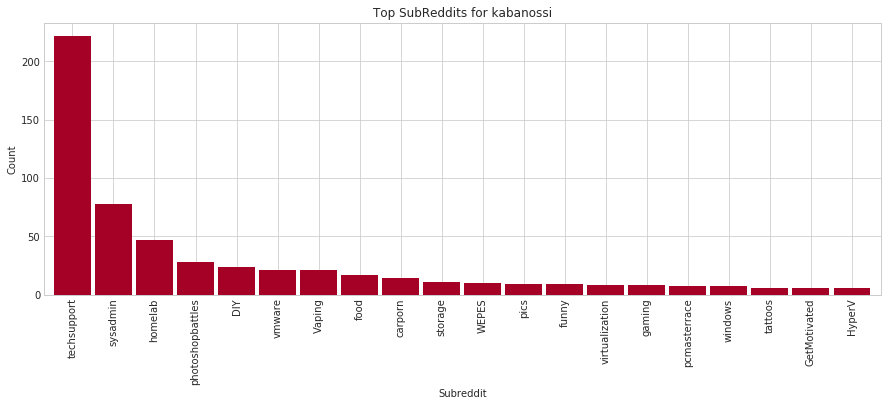

In [10]:
user_topreddits('kabanossi') 

** Lets check the top subreddits for username : MahatmaGuru**

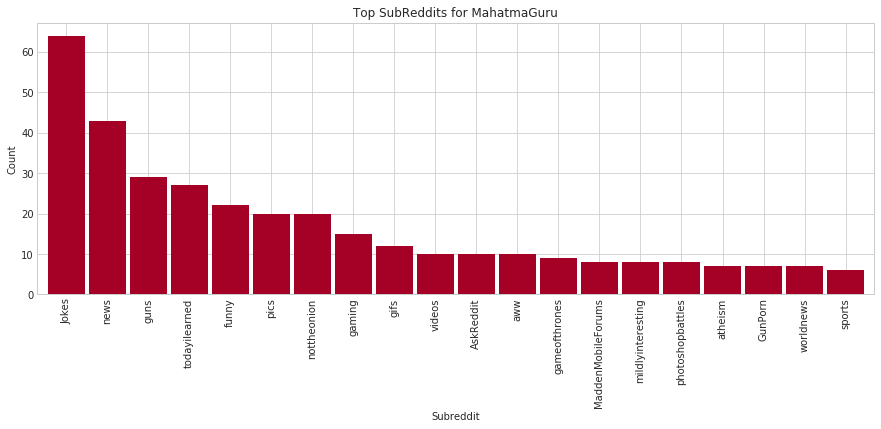

In [11]:
user_topreddits('MahatmaGuru') 

### Plotting the top 10 users having most number of unique subreddits

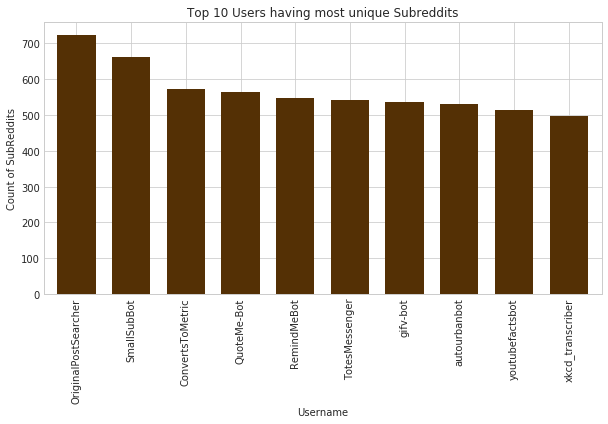

In [12]:
username = df.groupby(['username'])['subreddit'].nunique() #.value_counts()
username.sort_values(ascending=False)[:10].plot(kind = 'bar', width=0.7, cmap='BrBG')
# _ = username.set(xlabel='Username', ylabel='Count of SubReddits')
fig=plt.gcf()
fig.set_size_inches(10,5)
plt.title('Top 10 Users having most unique Subreddits')
plt.xlabel('Username')
plt.ylabel('Count of SubReddits')
plt.show()

### Plotting the top 10 subreddits having most number of unique user

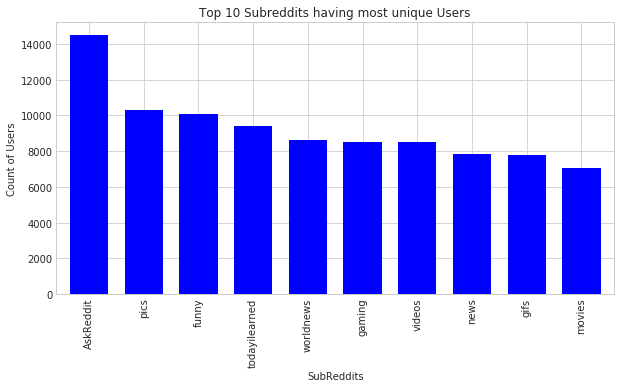

In [13]:
subreddits = df.groupby(['subreddit'])['username'].nunique()
subreddits.sort_values(ascending=False)[:10].plot(kind = 'bar', width=0.7, cmap='bwr', fontsize=10)
# _ = subreddits.set_value(ylabel='Count of Users', xlabel='SubReddits')
fig=plt.gcf()
fig.set_size_inches(10,5)
plt.title('Top 10 Subreddits having most unique Users')
plt.xlabel('SubReddits')
plt.ylabel('Count of Users')
plt.show()

----

# Feature Engineering

In [14]:
df2 = deepcopy(df)

In [15]:
# drop subreddits with less than 5 users
df2 = df2[(df2.groupby('subreddit')['username'].count() > 5).loc[df2['subreddit']].reset_index(drop=True)]
df2.reset_index(drop=True, inplace=True)

In [16]:
# drop users with less than 5 posted subreddits
df2 = df2[(df2.groupby('username')['subreddit'].count() > 5).loc[df2['username']].reset_index(drop=True)]
df2.reset_index(drop=True, inplace=True)

In [17]:
# Update counts
n_users_1 = df2.username.nunique()
n_subreddit_1 = df2.subreddit.nunique()
print('Number of unique Users before feature engineering: '+ str(n_users))
print('Number of unique users after feature engineering: '+ str(n_users_1))
print('\n')
print('Number of unique subreddit before feature engineering: '+str(n_subreddit))
print('Number of unique subreddit after feature engineering: '+str(n_subreddit_1))

Number of unique Users before feature engineering: 22610
Number of unique users after feature engineering: 22050


Number of unique subreddit before feature engineering: 34967
Number of unique subreddit after feature engineering: 16986


In [18]:
df2.shape                   # original data had 14000000

(13961818, 2)

** Preparing the matrix (User vs Item) for the Recommendation system **

In [19]:
df2['count'] = 1
df2 = df2.groupby(['username', 'subreddit'])['count'].count().reset_index()
df2.head(8)

,username,subreddit,count
0,--ANUSTART-,Addons4Kodi,1
1,--ANUSTART-,AdviceAnimals,7
2,--ANUSTART-,AskReddit,14
3,--ANUSTART-,Assistance,9
4,--ANUSTART-,CombatFootage,1
5,--ANUSTART-,Documentaries,1
6,--ANUSTART-,FantasyPL,3
7,--ANUSTART-,FiftyFifty,1


In [20]:
df2.shape   

(867256, 3)

In [15]:
#df2['subreddit'] = (df2['subreddit'] + ' ') * df2['count']
#data = df2.groupby('username')['subreddit'].sum()
#data = data.sample(frac = 0.1, random_state=0)
# vect = CountVectorizer(lowercase=False)
# mat = vect.fit_transform(data)

In [21]:
data = df2[0:4500]      # Taking a subset of the data because pivoting on the original data takes ages to compute
data = data.pivot('username', 'subreddit', 'count').reset_index()          # data_1 = data
data.shape   

(115, 1814)

In [22]:
data.head()

subreddit,username,0x3642,2007scape,2b2t,2meirl4meirl,30ROCK,3DS,3amjokes,3dshacks,40kLore,...,xxfitness,ynab,youdontsurf,youseeingthisshit,youtubehaiku,yugioh,zedmains,zelda,zoophilia,zyzz
0,--ANUSTART-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,--Sko--,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,--UNKN0WN--,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,--harley--quinn--,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-A-p-r-i-l-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
data.fillna(0, inplace=True)

In [24]:
data.head(10)          # Build the recommender system with this data 

subreddit,username,0x3642,2007scape,2b2t,2meirl4meirl,30ROCK,3DS,3amjokes,3dshacks,40kLore,...,xxfitness,ynab,youdontsurf,youseeingthisshit,youtubehaiku,yugioh,zedmains,zelda,zoophilia,zyzz
0,--ANUSTART-,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,--Sko--,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,--UNKN0WN--,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,--harley--quinn--,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-A-p-r-i-l-,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,-AragornElessar-,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,-BipolarPolarBear-,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
7,-Bolin-,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,-CANT_STUMP_TRUMP-,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,-CommonHouseCat-,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
data.index

RangeIndex(start=0, stop=115, step=1)

________

# Building a Recommender System

# --- 1. Simple popularity-based recommender function ---

* The code for the Recommender Systems model is below. This system is a naive approach and not personalized. It first get a unique count of user_name for each subreddit and tag it as a recommendation score. The recommend function then accept a user_name and output the top ten recommended subreddit for any given user. 

In [26]:
#Create the popularity based recommender system model    
def create(data, user_name, item_name):
    
    global popularity_recommendations
    
    #Get a count of usernames for each unique subreddit as recommendation score
    data_grouped = data.groupby([item_name]).agg({user_name: 'count'}).reset_index()
    data_grouped.rename(columns = {user_name: 'score'},inplace=True)

    #Sort the subreddit based upon recommendation score
    data_sort = data_grouped.sort_values(['score', item_name], ascending = [0,1])

    #Generate a recommendation rank based upon score
    data_sort['Rank'] = data_sort['score'].rank(ascending=0, method='first')

    #Get the top 10 recommendations
    popularity_recommendations = data_sort.head(10)
    
    return None

    
#Use the popularity based recommender system model to make recommendations
def recommend(user_name):    
    user_recommendations = popularity_recommendations

    #Add user_id column for which the recommendations are being generated
    user_recommendations['user_name'] = user_name

    #Bring user_id column to the front
    cols = user_recommendations.columns.tolist()
    cols = cols[-1:] + cols[:-1]
    user_recommendations = user_recommendations[cols]

    return user_recommendations

In [27]:
create(df,user_name ='username', item_name = 'subreddit')

### Iteration 1:

In [28]:
recommend('kabanossi')

,user_name,subreddit,score,Rank
1402,kabanossi,AskReddit,1030290,1.0
29812,kabanossi,politics,367860,2.0
17058,kabanossi,The_Donald,216939,3.0
28536,kabanossi,nfl,173883,4.0
26783,kabanossi,leagueoflegends,157663,5.0
34646,kabanossi,worldnews,156605,6.0
24419,kabanossi,funny,152921,7.0
28380,kabanossi,nba,150985,8.0
29564,kabanossi,pics,143496,9.0
28497,kabanossi,news,140492,10.0


### Iteration 2:

In [29]:
recommend('ThundercuntIII')

,user_name,subreddit,score,Rank
1402,ThundercuntIII,AskReddit,1030290,1.0
29812,ThundercuntIII,politics,367860,2.0
17058,ThundercuntIII,The_Donald,216939,3.0
28536,ThundercuntIII,nfl,173883,4.0
26783,ThundercuntIII,leagueoflegends,157663,5.0
34646,ThundercuntIII,worldnews,156605,6.0
24419,ThundercuntIII,funny,152921,7.0
28380,ThundercuntIII,nba,150985,8.0
29564,ThundercuntIII,pics,143496,9.0
28497,ThundercuntIII,news,140492,10.0


## Conclusion

* Drawback : since this is the naive approach, the recommendation is not personalized and will be the same for all users.

# --- 2. Item Based Collaborative Filtering ---#

**Reminder: In item based collaborative filtering we do not care about the user column.**

In [30]:
# Droping column named "username"
data_1 = data.drop('username', axis = 1)
data_1.head()

subreddit,0x3642,2007scape,2b2t,2meirl4meirl,30ROCK,3DS,3amjokes,3dshacks,40kLore,4PanelCringe,...,xxfitness,ynab,youdontsurf,youseeingthisshit,youtubehaiku,yugioh,zedmains,zelda,zoophilia,zyzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
data_1.shape

(115, 1813)

In [32]:
# Create a placeholder dataframe listing item vs. item
data_cooccurence = pd.DataFrame(index=data_1.columns,columns=data_1.columns)
data_cooccurence.head()

subreddit,0x3642,2007scape,2b2t,2meirl4meirl,30ROCK,3DS,3amjokes,3dshacks,40kLore,4PanelCringe,...,xxfitness,ynab,youdontsurf,youseeingthisshit,youtubehaiku,yugioh,zedmains,zelda,zoophilia,zyzz
subreddit,,,,,,,,,,,,,,,,,,,,,
0x3642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007scape,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2b2t,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2meirl4meirl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30ROCK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
# Lets fill in those empty spaces with cosine similarities
# Loop through the columns ie rows
for i in range(0,len(data_cooccurence.columns)) :
    # Loop through the columns for each column
    for j in range(0,len(data_cooccurence.columns)) :
      # Fill in placeholder with cosine similarities
      data_cooccurence.iloc[i,j] = 1-cosine(data_1.iloc[:,i],data_1.iloc[:,j])

In [34]:
data_cooccurence.shape           

(1813, 1813)

In [50]:
data_cooccurence.iloc[:20, :21]                # co-occurence matrix

subreddit,0x3642,2007scape,2b2t,2meirl4meirl,30ROCK,3DS,3amjokes,3dshacks,40kLore,4PanelCringe,...,4x4,5nafcirclejerk,ADHD,AMA,AMD_Stock,ANormalDayInRussia,AbandonedPorn,AccidentalRacism,AccidentalRenaissance,AceAttorney
subreddit,,,,,,,,,,,,,,,,,,,,,
0x3642,1,0,0,0,0.816497,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2007scape,0,1,0,0,0,0.00126122,0,0,0,0.0117639,...,0,0,0,0.0043441,0,0,0,0,0,0
2b2t,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2meirl4meirl,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0.341121,0,0.23094,0,0,0.343376,0
30ROCK,0.816497,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0.816497,0,0
3DS,0,0.00126122,0,0,0,1,0,0,0,0.107211,...,0,0,0,0.0395904,0,0,0,0,0,0
3amjokes,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3dshacks,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
40kLore,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


** Checking the top 10 nearest neighbour reddits to subreddit : 'AskReddit'**

In [36]:
data_cooccurence.ix['AskReddit'].sort_values(ascending=False)[1:10]

subreddit
books              0.614813
army               0.599113
civbattleroyale    0.599113
roadtrip           0.599113
ADHD               0.599113
40kLore            0.599113
LaserDisc          0.599113
Metal              0.599113
Tacoma             0.599113
Name: AskReddit, dtype: object

In [37]:
# Create a placeholder items for closes neighbours to an item
data_neighbours = pd.DataFrame(index=data_cooccurence.columns, columns=range(1,11))

data_neighbours.head(10)

,1,2,3,4,5,6,7,8,9,10
subreddit,,,,,,,,,,
0x3642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007scape,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2b2t,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2meirl4meirl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30ROCK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3DS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3amjokes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3dshacks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40kLore,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
# Loop through our similarity dataframe and fill in neighbouring item names
for i in range(0,len(data_cooccurence.columns)):
    data_neighbours.iloc[i,:10] = data_cooccurence.iloc[:,i].sort_values(ascending=False)[:10].index

In [39]:
data_neighbours.iloc[:, 1:10].head(10)

,2,3,4,5,6,7,8,9,10
subreddit,,,,,,,,,
0x3642,PastAndPresentPics,JustUnsubbed,AskACountry,unknownvideos,malcolminthemiddle,Lightbulb,juxtaposition,internetparents,hypotheticalsituation
2007scape,netsecstudents,Monstercat,SocialEngineering,Pathfinder,hacking,cutenoobs,jobs,dndnext,ThreadKillers
2b2t,2b2t,PokemonCreate,PetiteGoneWild,PhilosophyofScience,PictureGame,Pinterest,Piracy,PixelArt,PkmnGiveawayRefs
2meirl4meirl,tiltshift,shittyideas,AyyMD,chairsunderwater,VaporwaveArt,ProjectReality,PuppySmiles,DeskCorners,buildapcforme
30ROCK,SweatyPalms,coolguides,screenshots,biggestproblem,thesims,Nicegirls,NewsOfTheWeird,MyNameIsEarl,BetterEveryLoop
3DS,PS4,PokemonCreate,PokemonPlaza,TheFestivalPlaza,chicagobulls,PokemonGoChi,nba,pokemon,NoMansSkyTheGame
3amjokes,MacOS,TalesFromYourServer,GamersBeingBros,AskParents,Fuckthealtright,3amjokes,VideoEditing,spaceflightporn,altright
3dshacks,UIUC,HyruleWarriors,inthenews,shittyaskscience,explainlikeimfive,LifeProTips,todayilearned,videos,askscience
40kLore,roadtrip,LaserDisc,army,AskAnAmerican,classiccars,civbattleroyale,typewriters,MechanicAdvice,40kLore


## Conclusion 

* From the above matrix, we can generate the top similar subreddits for a particular subreddit based on the cosine similarities which can be used to recommend the similar subreddits to the user.  

# ---User Based Collaborative Filtering---#

In [40]:
# Helper function to get similarity scores
def getScore(history, similarities):
    return sum(history*similarities)/sum(similarities)

In [41]:
data.index

RangeIndex(start=0, stop=115, step=1)

In [42]:
# Create a place holder matrix for similarities, and fill in the user name column
data_sims = pd.DataFrame(index = data.index, columns = data.columns)
data_sims.iloc[:,:1] = data.iloc[:,:1]

data_sims.head(20)

subreddit,username,0x3642,2007scape,2b2t,2meirl4meirl,30ROCK,3DS,3amjokes,3dshacks,40kLore,...,xxfitness,ynab,youdontsurf,youseeingthisshit,youtubehaiku,yugioh,zedmains,zelda,zoophilia,zyzz
0,--ANUSTART-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,--Sko--,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,--UNKN0WN--,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,--harley--quinn--,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-A-p-r-i-l-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,-AragornElessar-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,-BipolarPolarBear-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,-Bolin-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,-CANT_STUMP_TRUMP-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,-CommonHouseCat-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
#Loop through all rows, skip the user column, and fill with similarity scores
for i in range(0,len(data_sims.index)):
    for j in range(1,len(data_sims.columns)):
        user = data_sims.index[i]
        product = data_sims.columns[j]
        #print(user,product)
        
        if data.iloc[i][j] >= 1:
            data_sims.iloc[i][j] = 0
        else:
            product_top_names = data_neighbours.ix[product][1:10]
            product_top_sims = data_cooccurence.ix[product].sort_values(ascending=False)[1:10]
            user_purchases = data_1.ix[user,product_top_names]
 
            data_sims.iloc[i][j] = getScore(user_purchases,product_top_sims)

In [44]:
data_sims.head(10)

subreddit,username,0x3642,2007scape,2b2t,2meirl4meirl,30ROCK,3DS,3amjokes,3dshacks,40kLore,...,xxfitness,ynab,youdontsurf,youseeingthisshit,youtubehaiku,yugioh,zedmains,zelda,zoophilia,zyzz
0,--ANUSTART-,0,0,0,0,0,0,0,0.198719,0,...,0,0,0,0,0,0,0,0,0,0.752193
1,--Sko--,0,0,0,0,0,0,0,0.206476,0,...,0,0,0,0,0,0,0,0,0,0
2,--UNKN0WN--,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,--harley--quinn--,0,0,0,0,0,0,0,0.827091,0,...,0,0,0,1.51994,0,0,0,0,0,0
4,-A-p-r-i-l-,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,-AragornElessar-,0,0,0,0,0,0,0,0.0455618,0,...,0,0,0,0,0,0,0,0,0,0
6,-BipolarPolarBear-,0,0,0,0,0,0.771369,0,1.10302,0,...,0,0,0,0.327585,0,0,0,0,0,0
7,-Bolin-,0,0,0,0,0,0,0,0.0434349,0,...,0,0,0,0,0,0,0,0,0,0
8,-CANT_STUMP_TRUMP-,0,0,0,0,0,0,0,0.335547,0,...,0,0,0,0,0,0,0,0,0,0
9,-CommonHouseCat-,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
# Get the top subreddits
data_recommend = pd.DataFrame(index=data_sims.index, columns=['user','1','2','3','4','5','6','7','8','9','10'])
data_recommend.ix[0:,0] = data_sims.ix[:,0]

In [46]:
data_recommend.head()

,user,1,2,3,4,5,6,7,8,9,10
0,--ANUSTART-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,--Sko--,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,--UNKN0WN--,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,--harley--quinn--,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-A-p-r-i-l-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
# Instead of top subreddit scores, we want to see names
for i in range(0,len(data_sims.index)):
    data_recommend.ix[i,1:] = data_sims.ix[i,:].sort_values(ascending=False).ix[1:11,].index.transpose()

In [48]:
data_recommend.head(10)

,user,1,2,3,4,5,6,7,8,9,10
0,--ANUSTART-,pharmacy,PSP,awardtravel,summonerschool,lgv20,churning,steroids,tdi,sjwhate,books
1,--Sko--,gaming,MineralPorn,ProjectFi,banned,JenniferLawrence,EarthPorn,nottheonion,books,IBM,counting
2,--UNKN0WN--,Polandballart,PerfectTiming,PetiteGoneWild,PhilosophyofScience,PictureGame,Pinterest,Piracy,PixelArt,PkmnGiveawayRefs,PlantBasedDiet
3,--harley--quinn--,tdi,BlueJackets,penguins,NHLStreams,EmpireDidNothingWrong,pittsburgh,boxoffice,r4r,sjwhate,fo4
4,-A-p-r-i-l-,fo4,sjwhate,books,funny,truechildfree,exchristian,thelongdark,childfree,whatsthisbird,FORTnITE
5,-AragornElessar-,tdi,sjwhate,fo4,whatsthisbird,funny,thedivision,FIFA,news,banned,JenniferLawrence
6,-BipolarPolarBear-,tdi,Mafia3,arma,books,banned,JenniferLawrence,sjwhate,Impeach_Trump,fo4,EmpireDidNothingWrong
7,-Bolin-,tdi,sjwhate,books,funny,truechildfree,exchristian,thelongdark,childfree,whatsthisbird,JenniferLawrence
8,-CANT_STUMP_TRUMP-,minnesotavikings,Bigly,the_frauke,phonelosers,consolerepair,RandomActsofTrump,electronicmusic,gifs,pics,banned
9,-CommonHouseCat-,tdi,Dexter,F13thegame,Alienware,PopCornTime,computers,PathOfExileBuilds,Warframe,RainbowSixSiege,sjwhate


## -----------------------------------------------------END---------------------------------------------------------------